In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv",index_col = "ID")

In [3]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                         
1     20000.0    2          2         1   24      2      2     -1     -1   
2    120000.0    2          2         2   26     -1      2      0      0   
3     90000.0    2          2         2   34      0      0      0      0   
4     50000.0    2          2         1   37      0      0      0      0   
5     50000.0    1          2         1   57     -1      0     -1      0   

    PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
ID         ...                                                                  
1      -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
2       0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
3       0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
4       0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
5       0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

    PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
ID                                                            
1        0.0       0.0       0.0                           1  
2     1000.0       0.0    2000.0                           1  
3     1000.0    1000.0    5000.0                           0  
4     1100.0    1069.0    1000.0                           0  
5     9000.0     689.0     679.0                           0  

[5 rows x 24 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [5]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace = True)

In [6]:
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

In [7]:
df['EDUCATION'] = np.where(df['EDUCATION'].isin([0, 5, 6]), 4, df['EDUCATION'])

In [26]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<AxesSubplot:ylabel='ID'>

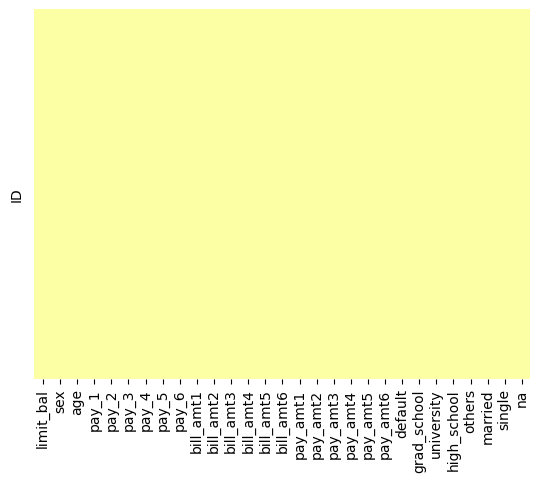

In [27]:
#Checking missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='inferno_r')

In [10]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(columns={"pay_0": "pay_1","default.payment.next.month":"default"})
col = df.columns.values
col_names = [str(i) for i in col]

In [11]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school']= (df['education']==3).astype('int')
df['others']= (df['education']==4).astype('int')
df['others']= (df['education']==5).astype('int')
df['others']= (df['education']==6).astype('int')
df['others']= (df['education']==0).astype('int')
df.drop('education',axis=1,inplace=True)

In [12]:
df.columns

Index(['limit_bal', 'sex', 'marriage', 'age', 'pay_1', 'pay_2', 'pay_3',
       'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3',
       'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default',
       'grad_school', 'university', 'high_school', 'others'],
      dtype='object')

In [13]:
df.info

<bound method DataFrame.info of        limit_bal  sex  marriage  age  pay_1  pay_2  pay_3  pay_4  pay_5  \
ID                                                                        
1        20000.0    2         1   24      2      2     -1     -1     -2   
2       120000.0    2         2   26     -1      2      0      0      0   
3        90000.0    2         2   34      0      0      0      0      0   
4        50000.0    2         1   37      0      0      0      0      0   
5        50000.0    1         1   57     -1      0     -1      0      0   
...          ...  ...       ...  ...    ...    ...    ...    ...    ...   
29996   220000.0    1         1   39      0      0      0      0      0   
29997   150000.0    1         2   43     -1     -1     -1     -1      0   
29998    30000.0    1         2   37      4      3      2     -1      0   
29999    80000.0    1         1   41      1     -1      0      0      0   
30000    50000.0    1         1   46      0      0      0      0    

In [14]:
print("Explanatory variables are  {}".format(len(df.columns)-1))
print("Number of Observations is: {}".format(df.shape[0]))

df['default'] = df['default'].astype('category')

print("Target variable:       '{}' -> '{}'".format('default payment next month', 'default'))

Explanatory variables are  26
Number of Observations is: 30000
Target variable:       'default payment next month' -> 'default'


In [15]:
df.head()

limit_bal  sex  marriage  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  \
ID                                                                            
1     20000.0    2         1   24      2      2     -1     -1     -2     -2   
2    120000.0    2         2   26     -1      2      0      0      0      2   
3     90000.0    2         2   34      0      0      0      0      0      0   
4     50000.0    2         1   37      0      0      0      0      0      0   
5     50000.0    1         1   57     -1      0     -1      0      0      0   

    ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  default  \
ID  ...                                                              
1   ...     689.0       0.0       0.0       0.0       0.0        1   
2   ...    1000.0    1000.0    1000.0       0.0    2000.0        1   
3   ...    1500.0    1000.0    1000.0    1000.0    5000.0        0   
4   ...    2019.0    1200.0    1100.0    1069.0    1000.0        0   
5   ...   36681.0   10000.0    9000.0     689.0     679.0        0   

    grad_school  university  high_school  others  
ID                                                
1             0           1            0       0  
2             0           1            0       0  
3             0           1            0       0  
4             0           1            0       0  
5             0           1            0       0  

[5 rows x 27 columns]

In [16]:
pay_status_columns = []
for x in range(1,7): pay_status_columns.append("pay_"+ str(x))
    
bill_amt_columns = []
for x in range(1,7): bill_amt_columns.append("bill_amt"+ str(x))
    
pay_amt_columns = []
for x in range(1,7): pay_amt_columns.append("pay_amt"+ str(x))

In [17]:
perf_metrics = ['Model','Model_Desc','TP','FP','FN','TN','AUC',\
                'Accuracy_Score','Precision','Recall',\
                'F1_Score', 'Matt_Coeff']
df_all_models = pd.DataFrame(columns=perf_metrics)
perf_metric_per_model = {}

In [19]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_curve, auc, precision_recall_curve

In [18]:
# for model evaluation
# Get the performance metrics for the models
def save_performance_metrics(model, model_name, model_dsc, X_test, y_test, X_train=None, y_train=None):
    perf_metric_per_model = {}
    perf_metric_per_model['Model'] = model_name
    perf_metric_per_model['Model_Desc'] = model_dsc
    y_pred = model.predict(X_test)
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    tn, fp, fn, tp = conf_mat.ravel()
    perf_metric_per_model['TP'], perf_metric_per_model['FP'] = tp, fp
    perf_metric_per_model['FN'], perf_metric_per_model['TN'] = fn, tn
    perf_metric_per_model['AP'], perf_metric_per_model['AN'] = tp+fn, fp+tn
    perf_metric_per_model['AUC'] = roc_auc_score(y_test, y_pred)
    perf_metric_per_model['F1_Score'] = f1_score(y_test, y_pred)
    perf_metric_per_model['Accuracy_Score'] = accuracy_score(y_test, y_pred)
    perf_metric_per_model['Precision'] = precision_score(y_test, y_pred)
    perf_metric_per_model['Recall'] = recall_score(y_test, y_pred) 
    if X_train is not None and y_train is not None:
        perf_metric_per_model['Train_score'] = model.score(X_train, y_train)    
    perf_metric_per_model['Test_score'] = model.score(X_test, y_test)    
    perf_metric_per_model['Matt_Coeff'] = matthews_corrcoef(y_test, y_pred)
    return pd.DataFrame.from_dict(perf_metric_per_model, orient='index').T.set_index('Model')

    
# plot feature importances
#"not applicable to Logistic Regression" 
def plot_feature_importance(model_name, importances, columns):
    # feature importances
    plt.figure(figsize=(12,6))
    indices = np.argsort(importances)[::-1]
    indices = indices[:10]
    plt.title('Top 10 Feature Importances by {}'.format(model_name))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), columns[indices])
    plt.xlabel('Relative Importance')
    plt.show()

# plot ROC and Precision, Recall curve
def plot_roc_and_precision(model_name, model, X_test, y_test):
    # calculate the fpr and tpr for all thresholds of the classification
    probs = model.predict_proba(X_test)
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    
    # AUC under ROC Curve 
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR or Recall')
    plt.xlabel('FPR (1-Specificity)')

    # precision and recall curve
    plt.subplot(122)
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    plt.step(recall, precision, color='b', alpha=0.1, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve for {}'.format(model_name))

    plt.tight_layout(pad=4.0, w_pad=0.5, h_pad=1.0)
    plt.show()

# Confusion Matrix function
def CMatrix(CM, labels=['pay', 'default']):
    df1 = pd.DataFrame(data=CM, index=labels, columns=labels)
    df1.index.name = 'Actual'
    df1.columns.name = 'Predicted'
    df1.loc['Total'] = df1.sum()
    df1['Total'] = df1.sum(axis=1)
    return df1

metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'auc_roc_score'], columns=['LogR', 'DTree', 'RF'])

In [19]:
cols_to_drop = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','sex','marriage','default']
df_temp = df.drop(labels=cols_to_drop,axis=1)
df_temp.describe()

limit_bal           age      bill_amt1      bill_amt2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          bill_amt3      bill_amt4      bill_amt5      bill_amt6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.666250e+03    2326.750000    1763.000000    1256.000000   
50%    2.008850e+04   19052.000000   18104.500000   17071.000000   
75%    6.016475e+04   54506.000000   50190.500000   49198.250000   
max    1.664089e+06  891586.000000  927171.000000  961664.000000   

            pay_amt1      pay_amt2      pay_amt3       pay_amt4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            pay_amt5       pay_amt6   grad_school    university   high_school  \
count   30000.000000   30000.000000  30000.000000  30000.000000  30000.000000   
mean     4799.387633    5215.502567      0.352833      0.467667      0.163900   
std     15278.305679   17777.465775      0.477859      0.498962      0.370191   
min         0.000000       0.000000      0.000000      0.000000      0.000000   
25%       252.500000     117.750000      0.000000      0.000000      0.000000   
50%      1500.000000    1500.000000      0.000000      0.000000      0.000000   
75%      4031.500000    4000.000000      1.000000      1.000000      0.000000   
max    426529.000000  528666.000000      1.000000      1.000000      1.000000   

        others  
count  30000.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

In [20]:
df['married'] = (df['marriage'] == 1).astype(int)
df['single'] = (df['marriage'] == 2).astype(int)
df['na'] = ((df['marriage'] == 3) | (df['marriage'] == 0)).astype(int)
df.drop(['marriage'], axis=1, inplace=True)

df_corr = df.copy()
df_corr['default'] = df['default']
#correlation matrix
cm = df_corr.corr()

# Since 0 is labeled as 'pay duly', every negative value should be seen as 0.
for i in pay_status_columns:
    df[i].replace({-2: -1, -1: -1}, inplace=True)

df.head()

limit_bal  sex  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
ID                                                                             
1     20000.0    2   24      2      2     -1     -1     -1     -1     3913.0   
2    120000.0    2   26     -1      2      0      0      0      2     2682.0   
3     90000.0    2   34      0      0      0      0      0      0    29239.0   
4     50000.0    2   37      0      0      0      0      0      0    46990.0   
5     50000.0    1   57     -1      0     -1      0      0      0     8617.0   

    ...  pay_amt5  pay_amt6  default  grad_school  university  high_school  \
ID  ...                                                                      
1   ...       0.0       0.0        1            0           1            0   
2   ...       0.0    2000.0        1            0           1            0   
3   ...    1000.0    5000.0        0            0           1            0   
4   ...    1069.0    1000.0        0            0           1            0   
5   ...     689.0     679.0        0            0           1            0   

    others  married  single  na  
ID                               
1        0        1       0   0  
2        0        0       1   0  
3        0        0       1   0  
4        0        1       0   0  
5        0        1       0   0  

[5 rows x 29 columns]

In [21]:
from sklearn.preprocessing import *

In [22]:
#Scaling
scale = ['limit_bal','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6','pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
robust_scaler = RobustScaler()
df.loc[:,scale] = robust_scaler.fit_transform(df.loc[:,scale])

# df.head()

In [23]:
col_values = df.columns.values
print(type(col_values))
out = np.delete(col_values, np.where(col_values == 'default'))
col_values = out 
print(col_values)

<class 'numpy.ndarray'>
['limit_bal' 'sex' 'age' 'pay_1' 'pay_2' 'pay_3' 'pay_4' 'pay_5' 'pay_6'
 'bill_amt1' 'bill_amt2' 'bill_amt3' 'bill_amt4' 'bill_amt5' 'bill_amt6'
 'pay_amt1' 'pay_amt2' 'pay_amt3' 'pay_amt4' 'pay_amt5' 'pay_amt6'
 'grad_school' 'university' 'high_school' 'others' 'married' 'single' 'na']


In [24]:
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.model_selection import *
from sklearn.feature_selection import *

In [25]:
lr = LogisticRegression(random_state=2023)
dt = DecisionTreeClassifier(random_state=2023)
rf = RandomForestClassifier(random_state=2023)

X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, test_size=.2)

# create the RFE model and select 10 attributes
rfe1 = RFE(lr, n_features_to_select=10)
rfe1 = rfe1.fit(X, y)
print('Logistic Regression Feature Rankings:')
print(rfe1.ranking_)
print('==' * 40)

rfe2 = RFE(dt, n_features_to_select=10)
rfe2 = rfe2.fit(X, y)
print('Decision Tree Feature Rankings:')
print(rfe2.ranking_)
print('==' * 40)

rfe3 = RFE(rf, n_features_to_select=10)
rfe3 = rfe3.fit(X, y)
print('Random Forest Feature Rankings:')
print(rfe3.ranking_)
print('==' * 42)

Logistic Regression Feature Rankings:
[ 1  1 17  1  2  1  9  1  8  1  4  6 11 18 16  5 10 15 12 13 14  1  1  1
 19  1  3  7]
Decision Tree Feature Rankings:
[ 1  9  1  1  7 12 15  8 13  1  1  6  1  5  1  3  1  4  2  1  1 14 11 16
 19 10 17 18]
Random Forest Feature Rankings:
[ 1 13  1  1  5  8 10  9 11  1  1  1  1  1  1  1  2  3  6  7  4 15 12 17
 19 14 16 18]


In [28]:
# evaluation metric
scoring = 'accuracy'

# Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF2', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in sequence
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=2023)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    m = "%s: %f" % (name, cv_results.mean())
    print(m)

LR: 0.814333
RF2: 0.816333
DT: 0.722875


**Random Forest model performed marginally better in kfold**

In [29]:
#Selecting rf features since it performed good in KFold
X = df.iloc[:,[0,1,2,8,9,10,11,12,13,14]]
y = df['default']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=.2)

rf.fit(X_train,y_train)

RandomForestClassifier(random_state=2023)

In [30]:
# create the RFE model and select 10 attributes
X = df.iloc[:,[0,1,2,8,9,10,11,12,13,15]]
y = df.default
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=.2)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print('mcc : {}'.format(matthews_corrcoef(y_true=y_test,y_pred=y_pred)))

tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4678
           1       0.52      0.22      0.31      1322

    accuracy                           0.78      6000
   macro avg       0.66      0.58      0.59      6000
weighted avg       0.75      0.78      0.75      6000

mcc : 0.229996804244685

 TN: 4411 FP: 267 FN: 1034 TP: 288 

auc: 0.5803880332117569
accuracy: 0.7831666666666667


In [31]:
# Fit the logistic regression model
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Rest of the code
model = lr
model_name = 'ITR1: Logistic Regression (post RFE)'
model_description = 'ITR1: Logistic Regression (with RFE)'
df_metric = save_performance_metrics(model, model_name, model_description, X_test, y_test, X_train, y_train)
display(df_metric)
plot_roc_and_precision(model_name, model, X_test, y_test)

Model_Desc  \
Model                                                                        
ITR1: Logistic Regression (post RFE)  ITR1: Logistic Regression (with RFE)   

                                      TP  FP    FN    TN    AP    AN  \
Model                                                                  
ITR1: Logistic Regression (post RFE)  73  44  1249  4634  1322  4678   

                                           AUC  F1_Score Accuracy_Score  \
Model                                                                     
ITR1: Logistic Regression (post RFE)  0.522907  0.101459         0.7845   

                                     Precision    Recall Train_score  \
Model                                                                  
ITR1: Logistic Regression (post RFE)  0.623932  0.055219    0.782625   

                                     Test_score Matt_Coeff  
Model                                                       
ITR1: Logistic Regression (post RFE)     0.7845   0.137325

In [32]:
print(classification_report(y_true=y_test,y_pred=y_pred))
print('mcc : {}'.format( matthews_corrcoef(y_true=y_test,y_pred=y_pred)))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4678
           1       0.62      0.06      0.10      1322

    accuracy                           0.78      6000
   macro avg       0.71      0.52      0.49      6000
weighted avg       0.75      0.78      0.71      6000

mcc : 0.1373245671872949

 TN: 4634 FP: 44 FN: 1249 TP: 73 

auc: 0.5229068178275496
accuracy: 0.7845


In [33]:
#Stacking Ensemble with RFE1
X = df.iloc[:,[0,2,3,4,6,10,8,9,14,24]]
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9)
X_train1, X_test1, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

M1 = LogisticRegression()
M2 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M3 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
M4 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M5 = DecisionTreeClassifier(max_depth=1,criterion='entropy')



M1.fit(X_train1,y_train2)
M2.fit(X_train1,y_train2)
M3.fit(X_train1,y_train2)
M4.fit(X_train1,y_train2)
M5.fit(X_train1,y_train2)


pred1 = M1.predict_proba(X_test1)
pred2 = M2.predict_proba(X_test1)
pred3 = M3.predict_proba(X_test1)
pred4 = M4.predict_proba(X_test1)
pred5 = M5.predict_proba(X_test1)


A = pd.DataFrame(pred1)[1]
B = pd.DataFrame(pred2)[1]
C = pd.DataFrame(pred3)[1]
D = pd.DataFrame(pred4)[1]
E = pd.DataFrame(pred5)[1]

X_meta = pd.concat([A,B,C,D,E],axis=1)

meta_classifier = RandomForestClassifier(max_depth=2,n_estimators=100)
meta_classifier.fit(X_meta,y_test2)


pred6 = M1.predict_proba(X_test)
pred7 = M2.predict_proba(X_test)
pred8 = M3.predict_proba(X_test)
pred9 = M4.predict_proba(X_test)
pred10 = M5.predict_proba(X_test)


F = pd.DataFrame(pred6)[1]
G = pd.DataFrame(pred7)[1]
H = pd.DataFrame(pred8)[1]
I = pd.DataFrame(pred9)[1]
J = pd.DataFrame(pred10)[1]

K = pd.concat([F,G,H,I,J], axis=1)
y_meta = meta_classifier.predict(K)

In [34]:
print(classification_report(y_meta,y_test))
print("auc:{}".format(roc_auc_score(y_meta,y_test)))
print("mcc: {}".format(matthews_corrcoef(y_meta,y_test)))
tn, fp, fn, tp = confusion_matrix(y_meta,y_test).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print("accuracy: {}".format(accuracy_score(y_meta,y_test)))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      2692
           1       0.32      0.65      0.42       308

    accuracy                           0.82      3000
   macro avg       0.63      0.75      0.66      3000
weighted avg       0.89      0.82      0.84      3000

auc:0.7451322822793848
mcc: 0.36365796521668736

 TN: 2255 FP: 437 FN: 107 TP: 201 

accuracy: 0.8186666666666667


In [35]:
#Stacking Ensemble with RFE3
X = df.iloc[:,[0,2,1,10,8,9,11,12,13,15]]
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=9)
X_train1, X_test1, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=9)

M1 = LogisticRegression()
M2 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M3 = DecisionTreeClassifier(max_depth=2,criterion='entropy')
M4 = DecisionTreeClassifier(max_depth=1,criterion='entropy')
M5 = DecisionTreeClassifier(max_depth=1,criterion='entropy')



M1.fit(X_train1,y_train2)
M2.fit(X_train1,y_train2)
M3.fit(X_train1,y_train2)
M4.fit(X_train1,y_train2)
M5.fit(X_train1,y_train2)


pred1 = M1.predict_proba(X_test1)
pred2 = M2.predict_proba(X_test1)
pred3 = M3.predict_proba(X_test1)
pred4 = M4.predict_proba(X_test1)
pred5 = M5.predict_proba(X_test1)


A = pd.DataFrame(pred1)[1]
B = pd.DataFrame(pred2)[1]
C = pd.DataFrame(pred3)[1]
D = pd.DataFrame(pred4)[1]
E = pd.DataFrame(pred5)[1]

X_meta = pd.concat([A,B,C,D,E],axis=1)

meta_classifier = RandomForestClassifier(max_depth=2,n_estimators=100)
meta_classifier.fit(X_meta,y_test2)


pred6 = M1.predict_proba(X_test)
pred7 = M2.predict_proba(X_test)
pred8 = M3.predict_proba(X_test)
pred9 = M4.predict_proba(X_test)
pred10 = M5.predict_proba(X_test)


F = pd.DataFrame(pred6)[1]
G = pd.DataFrame(pred7)[1]
H = pd.DataFrame(pred8)[1]
I = pd.DataFrame(pred9)[1]
J = pd.DataFrame(pred10)[1]

K = pd.concat([F,G,H,I,J], axis=1)
y_meta = meta_classifier.predict(K)

In [36]:
print(classification_report(y_meta,y_test))
print("auc:{}".format(roc_auc_score(y_meta,y_test)))
print("mcc: {}".format(matthews_corrcoef(y_meta,y_test)))
tn, fp, fn, tp = confusion_matrix(y_meta,y_test).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print("accuracy: {}".format(accuracy_score(y_meta,y_test)))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2810
           1       0.16      0.53      0.24       190

    accuracy                           0.79      3000
   macro avg       0.56      0.67      0.56      3000
weighted avg       0.91      0.79      0.84      3000

auc:0.6674283573702939
mcc: 0.19931440455135638

 TN: 2272 FP: 538 FN: 90 TP: 100 

accuracy: 0.7906666666666666


## Method 2: PCA

In [37]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import chi2,f_classif,SelectKBest
from sklearn.decomposition import PCA

#converting dataframe into numpy Array
X = df.drop('default',axis=1)
Y = df.default

# Split-out validation dataset
validation_size = 0.20
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=2023)

In [38]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 28 components which is actual number of Variables we have
pca = PCA(n_components=28)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#lets see Cumulative Variance plot
plt.plot(var1)

In [39]:
#Looking at above plot I'm taking 16 variables
pca = PCA(n_components=16)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

In [40]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=2023)))
models.append(('RF2', RandomForestClassifier(random_state=2023)))
models.append(('DT', DecisionTreeClassifier(random_state=2023)))

# evaluate each model
results = []
names = []
# evaluation metric
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle = True, random_state=2023)
    cv_results = cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

LR: 0.805708
RF2: 0.805833
DT: 0.717958


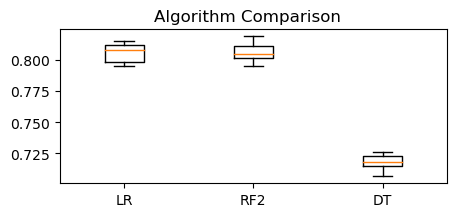

In [41]:
# Comparing Algorithms
fig = plt.figure(figsize=(5,2))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [42]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression(random_state=9)
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)

print("accuracy: {}".format(accuracy_score(Y_validation, predictions)))
tn, fp, fn, tp = confusion_matrix(Y_validation, predictions).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print(classification_report(Y_validation, predictions))
print("mcc: {}".format(matthews_corrcoef(Y_validation, predictions)))
print('auc: {}'.format(roc_auc_score(Y_validation, predictions)))

accuracy: 0.8031666666666667

 TN: 4566 FP: 135 FN: 1046 TP: 253 

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4701
           1       0.65      0.19      0.30      1299

    accuracy                           0.80      6000
   macro avg       0.73      0.58      0.59      6000
weighted avg       0.78      0.80      0.76      6000

mcc: 0.27807274259007825
auc: 0.5830239549051771


## Method 3: Select from Model

In [43]:
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

X = df.drop('default',axis=1)
y = df.default
print('Before');
print(X.shape)

clf = RandomForestClassifier()
clf.fit(X, y)

print('\nFeature Importance');
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

print('\nAfter'); 
print(X_new.shape)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=42)
smote = SMOTE(random_state=2023)              
X_sample, y_sample = smote.fit_resample(X_train, y_train)
clf.fit(X_sample, y_sample)
y_pred = clf.predict(X_test)

print(classification_report(y_true=y_test,y_pred=y_pred))
print('mcc : {}'.format( matthews_corrcoef(y_true=y_test,y_pred=y_pred)))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

Before
(30000, 28)

Feature Importance
[0.05914591 0.01189921 0.06720633 0.09414354 0.04881354 0.02697334
 0.01720762 0.0198741  0.01533371 0.059745   0.05396532 0.05188826
 0.05045557 0.05005462 0.05086064 0.05092578 0.04728892 0.04656192
 0.04341648 0.04325557 0.04590883 0.00887764 0.00950978 0.00766131
 0.         0.00872208 0.00845639 0.0018486 ]

After
(30000, 16)
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4687
           1       0.52      0.46      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000

mcc : 0.3598060462330916

 TN: 4136 FP: 551 FN: 708 TP: 605 

auc: 0.6716088203000602
accuracy: 0.7901666666666667


## Method 4

Predicted   pay  default  Total
Actual                         
pay        4531      156   4687
default     977      336   1313
Total      5508      492   6000

Model_Desc  \
Model                                                                                             
ITR2(KBest,K=25): Simple Logistic Regression  ITR2(KBest,K=25): basic Logistic Regression ap...   

                                               TP   FP   FN    TN    AP    AN  \
Model                                                                           
ITR2(KBest,K=25): Simple Logistic Regression  336  156  977  4531  1313  4687   

                                                   AUC  F1_Score  \
Model                                                              
ITR2(KBest,K=25): Simple Logistic Regression  0.611309  0.372299   

                                             Accuracy_Score Precision  \
Model                                                                   
ITR2(KBest,K=25): Simple Logistic Regression       0.811167  0.682927   

                                                Recall Train_score Test_score  \
Model                                                                           
ITR2(KBest,K=25): Simple Logistic Regression  0.255903    0.811333   0.811167   

                                             Matt_Coeff  
Model                                                    
ITR2(KBest,K=25): Simple Logistic Regression   0.335477

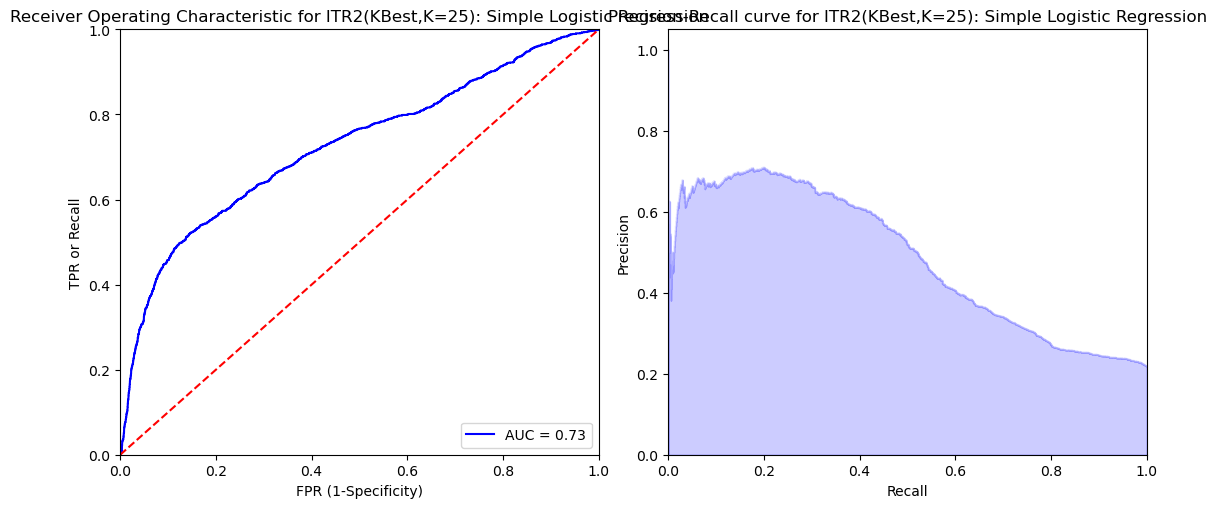

In [44]:
LogR = LogisticRegression(random_state=10)
LogR.fit(X_train, y_train)
y_pred_test = LogR.predict(X_test)

metrics.loc['accuracy','LogR'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','LogR'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','LogR'] = recall_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['auc_roc_score','LogR'] = roc_auc_score(y_score=y_pred_test,y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
model = LogR

model_name = 'ITR2(KBest,K=25): Simple Logistic Regression'
model_description = 'ITR2(KBest,K=25): basic Logistic Regression applied'
df_metric = save_performance_metrics(model, model_name, model_description, X_test, y_test, X_train, y_train)
display(CMatrix(CM))
display(df_metric)
plot_roc_and_precision(model_name, model, X_test, y_test)

Predicted   pay  default  Total
Actual                         
pay        4517      170   4687
default     915      398   1313
Total      5432      568   6000

Model_Desc  \
Model                                                                                
ITR2(KBest,K=25): Decision Tree  ITR2(KBest,K=25): Decision Tree (with max_leaf...   

                                  TP   FP   FN    TN    AP    AN       AUC  \
Model                                                                        
ITR2(KBest,K=25): Decision Tree  398  170  915  4517  1313  4687  0.633426   

                                 F1_Score Accuracy_Score Precision    Recall  \
Model                                                                          
ITR2(KBest,K=25): Decision Tree  0.423179       0.819167  0.700704  0.303123   

                                Train_score Test_score Matt_Coeff  
Model                                                              
ITR2(KBest,K=25): Decision Tree    0.820375   0.819167   0.376874

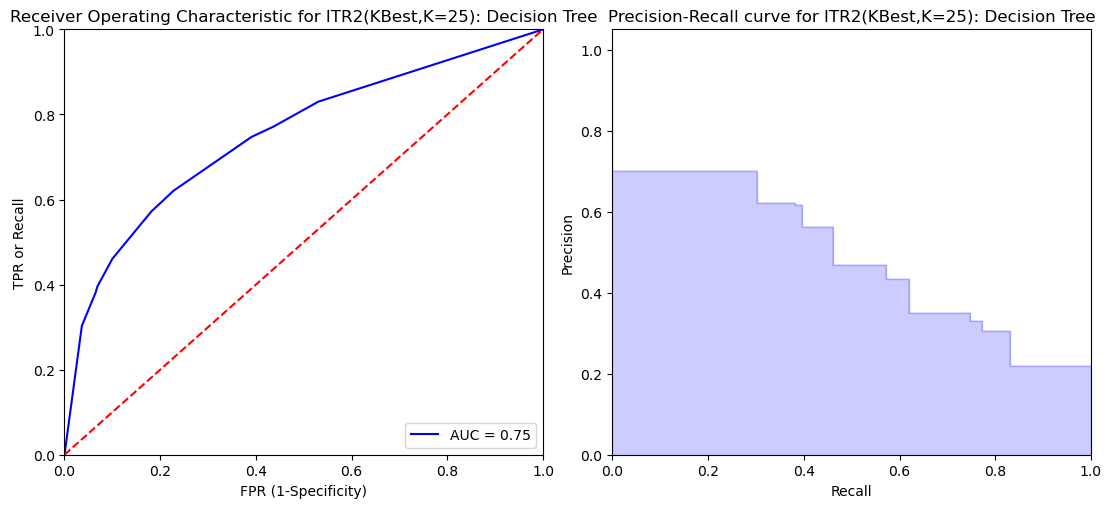

In [45]:
DTree = DecisionTreeClassifier(max_leaf_nodes=10,min_samples_split=30)
DTree.fit(X_train, y_train)

# print len(X_train[0])
y_pred_test = DTree.predict(X_test)
metrics.loc['accuracy','DTree'] = accuracy_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['precision','DTree'] = precision_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['recall','DTree'] = recall_score(y_pred=y_pred_test,y_true=y_test)
metrics.loc['auc_roc_score','DTree'] = roc_auc_score(y_score=y_pred_test,y_true=y_test)
CM = confusion_matrix(y_pred=y_pred_test,y_true=y_test)
model = DTree
model_name = 'ITR2(KBest,K=25): Decision Tree'
model_description = 'ITR2(KBest,K=25): Decision Tree (with max_leaf_node=10, sample_split=30)'
df_metric = save_performance_metrics(model, model_name, model_description, X_test, y_test, X_train, y_train)
display(CMatrix(CM))
display(df_metric)
plot_roc_and_precision(model_name, model, X_test, y_test)

## Method 5: XGBoost

In [46]:
from xgboost import XGBClassifier

#converting dataframe into numpy Array
X = df.drop('default',axis=1)
Y = df.default

# Split-out validation dataset
validation_size = 0.20
X_trainB, X_testB, Y_trainB, Y_testB = train_test_split(X, Y, test_size=validation_size, random_state=2023)

In [47]:
# fit model on training data
XGBoost = XGBClassifier()
XGBoost.fit(X_trainB, Y_trainB)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
# make predictions for test data
y_predB = XGBoost.predict(X_testB)
predictions = [round(value) for value in y_predB]

In [49]:
# evaluate predictions
print(classification_report(y_true=Y_testB,y_pred=y_predB))
print('mcc : {}'.format( matthews_corrcoef(y_true=Y_testB,y_pred=y_predB)))
tn, fp, fn, tp = confusion_matrix(y_true=Y_testB,y_pred=y_predB).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=Y_testB,y_score=y_predB)))
print('accuracy: {}'.format(accuracy_score(y_true=Y_testB,y_pred=y_predB)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4701
           1       0.65      0.36      0.46      1299

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000

mcc : 0.38767424199955164

 TN: 4447 FP: 254 FN: 831 TP: 468 

auc: 0.6531230395183966
accuracy: 0.8191666666666667


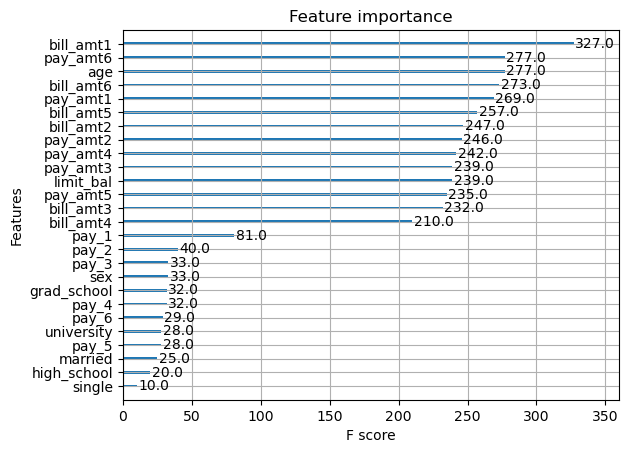

In [50]:
# plot feature importance using built-in function
from xgboost import plot_importance
plot_importance(XGBoost)
plt.show()